#                                               DEEP LEARNING PROJECT

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Building loan approval recognition system 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/upflairs-pvt-ltd/JECRC-20april2024/main/loan%20aproaval%20DL/loan_approval_dataset.csv", skipinitialspace=True)

In [3]:
df                  #reading the data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
df.info()           # checking infromation of present dataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [6]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [7]:
df['loan_status'].unique()

array(['Approved', 'Rejected'], dtype=object)

# space is there in the beginning in our dataset

 we'll use one-hot encoding to convert categorical values 
into numerical values

In [8]:
df2 = pd.get_dummies(df,drop_first="if_binary").astype(int) 
df2.head()
# by default skipinitialspace = False
# this will remove all the initial space

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes,loan_status_Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1


Splitting the data x and Y

In [9]:
x= df2.drop(['loan_status_Rejected','loan_id'],axis='columns')
y= df2[['loan_status_Rejected']]

In [10]:
x.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1


In [11]:
y.head()

,loan_status_Rejected
0,0
1,1
2,1
3,1
4,1


#train test split
#standard sclaer ANN

In [12]:
# standard scaler ANN
# scaling down in ANN is necessary otherwise accuracy will hamper
# outliers will get scaled down
# data scale down (data normalise)
from sklearn.preprocessing import StandardScaler

In [13]:
std_scaler = StandardScaler()
x_transformed = std_scaler.fit_transform(x)

In [14]:
x_transformed.shape , x.shape

((4269, 11), (4269, 11))

In [15]:
## train test split
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x_transformed,y,test_size=0.20)

# ANN is not pre-defined
# we need to create it
# -->  pip install tensorflow

In [17]:
import tensorflow as tl

# there are 3 layers in ANN
# --> Input layer
# --> Hidden layer
# --> Output layer

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
# ------>>>>------->>>>--------->>>>--------->>>>--------->>>>--
# no. of x_variables == no. of neurons in the input layer

# layers should be connected in sequential order (sequential nature) 
# meaning that-->

# output of one layer will act as input for the next upcoming layer

Artificial Neural Network Define

In [19]:
x_train.shape

(3415, 11)

# ARTIFICIAL NEURAL NETWORK DEFINING

In [20]:
ANN_model = Sequential()
# now we will add one-by-one layers in it manually

# Dense is a function from which we can create layers artificially.
# dense layer is the hidden layer


# we only need to define input layer once
# output of input layer will work as input for the another layer

# no. of neurons in input layer = no. of x_variables
# no. of neurons in hidden layer = n
# now no. of neurons in output layer -->

# --> In binary classification -> no. of neurons = 1
# --> In multiclass classification -> no. of neurons = no. of classes 
ANN_model.add(Dense(units=64,activation='relu',input_dim=11)) #first hidden layer with input layer
ANN_model.add(Dense(units=32,activation='relu')) #second hidden layer 2
ANN_model.add(Dense(units=16,activation='relu')) #third hidden layer 3

ANN_model.add(Dense(units=1,activation='sigmoid'))  #output layer  #binary layer
# activation function in hidden layer = 'relu'

# activation function in output layer --->
# In binary classification --> activation function = 'sigmoid'
# In multiclass classification --> activation function = 'softmax'

# FORWARD PROPAGATION DONE
# UPTILL NOW WE HAVE DEFINED OUR LAYERS

# NOW BACKWARD PROPAGATION


# NOW BACKWARD PROPAGATION
ANN_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
ANN_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


the function at hidden layer is different than output layer

In [21]:
x.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'education_Not Graduate',
       'self_employed_Yes'],
      dtype='object')

#categorical
# missing value

In [22]:
pd.DataFrame(x_train,columns=x.columns).head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes
0,-1.473548,1.582348,0.825735,-0.858444,1.514202,2.649195,1.874658,1.524132,0.191798,-0.995559,-1.007288
1,0.885344,-0.983115,-1.065376,-0.858444,-1.490260,-1.164503,-0.198967,-1.134424,-0.546707,1.004461,-1.007288
2,1.475067,-1.339430,-1.142790,-1.208798,-1.472860,-0.657035,-0.768644,-1.288225,-1.039045,1.004461,-1.007288
3,0.885344,-0.163592,-0.623011,1.594031,0.075772,-0.349479,0.211201,-0.156691,-0.608250,1.004461,0.992765
4,-1.473548,-1.054378,-1.153849,-1.559151,-0.817446,-0.534013,-0.837005,-0.771894,-1.162129,1.004461,-1.007288


In [23]:
x_train.shape, y_train.shape

((3415, 11), (3415, 1))

In [24]:
# Compile the model (required before training)
ANN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


#,validation_data=(x_test,y_test)

# epochs = 5, is equals to 5 times model training
# 1 forward propagation and 1 backward propagation = 1 epoch

In [25]:
# Fit the model with training data and validate on test data
history = ANN_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


c:\Users\ANKIT\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)




 97/107 [==========================>...] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.6169

c:\Users\ANKIT\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


107/107 [==============================] - 12s 20ms/step - loss: 0.0000e+00 - accuracy: 0.6199 - val_loss: 0.0000e+00 - val_accuracy: 0.6148
Epoch 2/10
107/107 [==============================] - 1s 11ms/step - loss: 0.0000e+00 - accuracy: 0.6240 - val_loss: 0.0000e+00 - val_accuracy: 0.6148
Epoch 3/10
107/107 [==============================] - 2s 16ms/step - loss: 0.0000e+00 - accuracy: 0.6240 - val_loss: 0.0000e+00 - val_accuracy: 0.6148
Epoch 4/10
107/107 [==============================] - 1s 9ms/step - loss: 0.0000e+00 - accuracy: 0.6240 - val_loss: 0.0000e+00 - val_accuracy: 0.6148
Epoch 5/10
107/107 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.6240 - val_loss: 0.0000e+00 - val_accuracy: 0.6148
Epoch 6/10
107/107 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.6240 - val_loss: 0.0000e+00 - val_accuracy: 0.6148
Epoch 7/10
107/107 [==============================] - 1s 12ms/step - loss: 0.0000e+00 - accuracy: 0.6240 - 

In [26]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.0,0.619912,0.0,0.614754
1,0.0,0.624012,0.0,0.614754
2,0.0,0.624012,0.0,0.614754
3,0.0,0.624012,0.0,0.614754
4,0.0,0.624012,0.0,0.614754
5,0.0,0.624012,0.0,0.614754
6,0.0,0.624012,0.0,0.614754
7,0.0,0.624012,0.0,0.614754
8,0.0,0.624012,0.0,0.614754
9,0.0,0.624012,0.0,0.614754


## prediction

In [27]:
prediction= ANN_model.predict(x_test)

27/27 [==============================] - 1s 3ms/step


In [28]:
prediction

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

# these values are the probabilities values in array
# range is 0 to 1
# if this probability > 0.5, then consider 1
# if this probability < 0.5, then consider 0

In [29]:
prediction>0.5

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

Converting 2-d arrya into 1-d array

# we don't want output in true/false (boolean)
# we want output in 0 and 1

# True --> 1
# False --> 0

# this is a 2D array
# now, we need to convert it in 1D array

In [30]:
pred= (prediction>0.5).astype(int).ravel() #ravel,reshape,flatten
# we can use ravel OR reshape OR flatten

In [31]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
y_test['prediction']=pred

In [33]:
y_test.head(5)

,loan_status_Rejected,prediction
370,0,0
978,1,0
2583,0,0
2177,0,0
2796,1,0


# analysing using confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
matrix= confusion_matrix(y_test['loan_status_Rejected'],y_test['prediction'])
matrix

array([[525,   0],
       [329,   0]], dtype=int64)

# [[TP, FP],
#  [FN, TN]]

# accuracy formula = (TP+TN)/(TP+TN+FP+FN)

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

## plotting this confusion matrix with the help of matplot.pyplot library

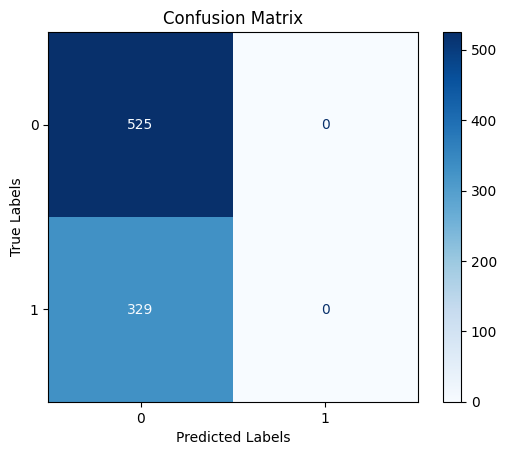

In [37]:
# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)

# Customize the plot
disp.plot(cmap='Blues')  # You can change the 'cmap' to any color map you prefer
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# analysing confusion matrix using heatmap

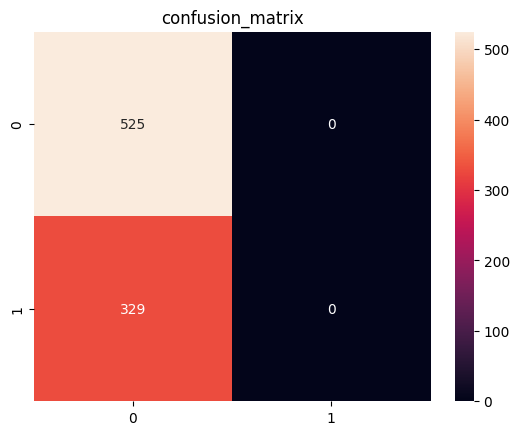

In [38]:
import seaborn as sns
sns.heatmap(matrix,annot=True,fmt="d")
plt.title('confusion_matrix')
plt.show()

In [39]:
print(classification_report(y_test['loan_status_Rejected'],y_test['prediction']))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       525
           1       0.00      0.00      0.00       329

    accuracy                           0.61       854
   macro avg       0.31      0.50      0.38       854
weighted avg       0.38      0.61      0.47       854



c:\Users\ANKIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ANKIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ANKIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

##model save in deep learning

# h5 is the extension for the tensorflow library
# ANN_model.save('./models/loan_approval.pt')

# .pt means model created using pytorch library instead of tensorflow

In [40]:
import os, joblib
os.makedirs('models',exist_ok=True)
ANN_model.save('./models/loan_approval.h5') 
joblib.dump(std_scaler,'./models/std_scaler.lb') #pytorch .pt

c:\Users\ANKIT\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['./models/std_scaler.lb']

StandardScaler()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [41]:
std_scaler

StandardScaler()

In [42]:
from tensorflow.keras.models import load_model

In [43]:
ann_model_loaded =load_model('./models/loan_approval.h5')

In [44]:
ann_model_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## to load the model

# from tensorflow.keras.models import load_model
# ann_model_loaded = load_model('./models/loan_approval.h5')

# ann_model_loaded.summary()